## Random Forest

### 1.¿Qué es un Random Forest?



### 2.¿Por qué usarlo?



### 3. Probando el algoritmo

#### 3.1 Creando el Dataset
Lo primero será tener un dataset de prueba, para ello se utilizarán los generadores de datos diponibles en [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#samples-generator). Para el primer test basta con tener nubes de puntos.

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import hdbscan
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [10]:
blobs, labels = make_blobs(n_samples=25000000, n_features=20,centers=10,random_state=9)

nfeatures_original=pd.DataFrame(blobs)
l=pd.DataFrame(data=labels,columns=["label"])
l['label']=l['label'].apply(lambda x: "Label_"+str(x))
nfeatures_original=nfeatures_original.join(l)
nfeatures_original.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-1.180987,1.240578,3.020975,-1.746975,-0.291096,-2.836429,1.910870,-0.688452,-1.341357,0.386906,0.282403,2.045138,1.381275,-2.368303,0.165511,0.479028,2.622244,1.431891,-0.094469,0.008586
std,5.660561,5.552799,4.825853,5.399640,7.367955,5.247887,4.684554,5.646922,5.638823,7.233953,3.700956,4.185818,5.575288,6.238378,5.164511,6.766531,4.103338,5.340570,5.054180,4.395648
min,-14.026723,-13.762399,-9.373089,-13.751342,-13.526813,-14.019405,-10.934058,-12.046078,-12.918819,-13.407943,-11.266958,-8.417818,-12.521822,-13.408967,-13.518929,-13.355585,-9.117708,-12.643270,-13.866750,-11.090146
25%,-5.085020,-0.745230,-0.944357,-5.986434,-7.144318,-7.149665,-1.749823,-5.825424,-6.363767,-7.540214,-3.102793,-1.834611,-2.290033,-7.429729,-4.571022,-6.720977,-0.077673,-0.950104,-3.070485,-3.091744
50%,-1.278812,2.378955,5.082070,-1.781434,-2.384345,-3.957533,2.681590,-1.544589,-1.406795,0.206154,1.544931,2.784781,1.576957,-4.869856,1.505666,2.887753,2.673839,2.373062,0.620384,-0.392320
75%,2.676867,5.871548,6.934630,0.660719,7.767558,0.182053,5.039391,4.071191,2.015313,7.861989,3.256303,5.679863,5.122707,3.718944,4.295971,6.845691,5.942965,5.311248,3.518761,4.029159
max,13.556880,11.365369,12.875444,13.932041,13.317516,10.508688,13.945744,12.866711,12.837818,13.992286,8.164877,12.039185,13.975856,14.084059,11.620537,12.714821,12.484557,12.841678,11.263108,10.297150


In [28]:
 print("Tiempo de ejecución: ", endtime- startTime)

Tiempo de ejecución:  0:00:58.510841


In [26]:
adicionales=[]
for i in range(0,200):
    punto=[]
    for j in range(0,(len(nfeatures_original.columns)-1)):
        ran=( 1+random.uniform(0, 1))*random.randrange(round(nfeatures_original[j].min(),0), round(nfeatures_original[j].max(),0))+random.uniform(0, 1)
        punto.append(ran)
    
    adicionales.append(punto)
    
ad=pd.DataFrame(adicionales)
ad['label']='outlier'
nfeatures_real= nfeatures_original.append(ad) 

In [9]:
features=[x for x in range(0,20)]

In [45]:
nfeatures_real_s=resample(nfeatures_real, n_samples=1000000)

In [27]:
startTime = datetime.now()
isolation=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, n_jobs=-1, random_state=42, verbose=0)
isolation.fit(nfeatures_real[features])
pred = isolation.predict(nfeatures_real[features])
endtime= datetime.now() 

nfeatures_real['isolation']= pred

#grafico_resultado(startTime,endtime,data_real,"isolation")

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [29]:
nfeatures_real

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,label,isolation
0,-5.152462,8.743964,-6.228969,4.621912,1.984940,-1.588263,-6.284619,7.686146,-8.144570,5.829765,...,2.731280,-3.157270,6.159876,-7.078751,1.241680,0.888596,3.635462,1.046433,Label_7,1
1,8.103748,9.068603,6.737136,-10.081112,-6.095118,-1.578612,4.819325,-1.958440,0.678059,-8.949015,...,-1.506047,-7.240162,-1.135546,5.084021,1.685560,7.245476,3.171517,-6.885198,Label_8,1
2,-10.358863,1.875949,-0.832134,-7.239938,-7.720367,-6.508560,-0.905859,-5.435373,-7.186020,-2.774749,...,10.103502,-10.050033,5.698472,0.647056,7.915397,4.503813,0.785072,3.679314,Label_0,1
3,-8.680637,-0.867427,0.206441,-7.429049,-6.416381,-5.995559,-1.574544,-3.883168,-7.463308,-2.943632,...,8.412328,-10.660180,4.306386,4.186586,7.915612,2.022164,2.246022,3.797092,Label_0,1
4,-12.172928,7.013938,6.225688,-0.643288,-9.659492,5.229915,5.024272,8.280273,0.967683,8.929223,...,4.218943,4.576279,3.215724,8.211520,3.484341,2.451965,6.825208,4.689224,Label_6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20.308573,-4.580396,-6.090955,-5.995497,20.868960,-26.390318,0.915352,-20.452540,15.111874,18.507852,...,13.043282,-12.316133,-17.746059,-7.865294,9.466587,12.749623,17.172633,-4.087323,outlier,-1
196,-4.693492,-8.012599,-13.968262,0.917262,4.164971,17.527475,0.571519,2.173227,-10.745324,12.324401,...,5.002277,3.049142,-16.248239,17.236101,12.594891,5.918356,-16.932345,-5.301673,outlier,-1
197,-9.203564,-6.999048,-9.236450,0.748426,-21.399704,10.258166,-13.372100,1.535723,-17.167840,19.609151,...,1.689169,-1.316303,-20.755968,2.051401,17.991307,11.629546,-8.854267,-11.091786,outlier,-1
198,9.051013,-0.971197,-10.081048,-12.865895,1.936510,-18.341594,11.286685,0.108875,-13.011154,-11.437077,...,-8.817726,-17.997337,-6.138682,22.408342,-3.815663,-0.896593,-7.649652,-11.629644,outlier,-1


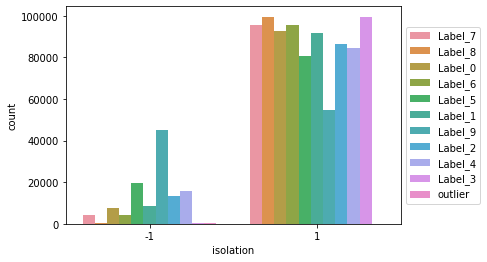

In [32]:
sns.countplot(data=nfeatures_real,x='isolation',hue='label')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

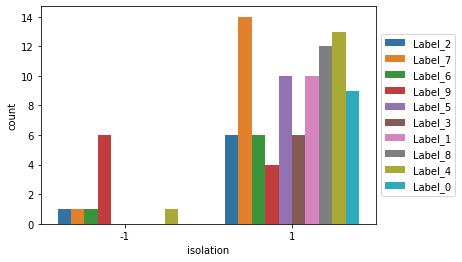

In [33]:
sns.countplot(data=nfeatures_real_s,x='isolation',hue='label')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [46]:
x_train, x_test, y_train, y_test = train_test_split( nfeatures_real_s[features], nfeatures_real_s['isolation'], test_size=0.8, random_state=42)

In [47]:
random_forest = RandomForestClassifier(n_jobs=2, random_state=0)

In [48]:
random_forest.fit(x_train,y_train)
accuracy=accuracy_score(y_test, random_forest.predict(x_test))
accuracy

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.93423125

In [49]:
accuracy=accuracy_score(nfeatures_real['isolation'], random_forest.predict(nfeatures_real[features]))
accuracy

0.9342151569686062

In [52]:
isolation3=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, n_jobs=-1, random_state=42, verbose=0)
isolation3.fit(nfeatures_real_s[features])

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [54]:
accuracy=accuracy_score(nfeatures_real['isolation'], isolation3.predict(nfeatures_real[features]))
accuracy

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0.8947250549890022